# NoteBook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Example 1
$$f(x) = x^2 + x + 1$$

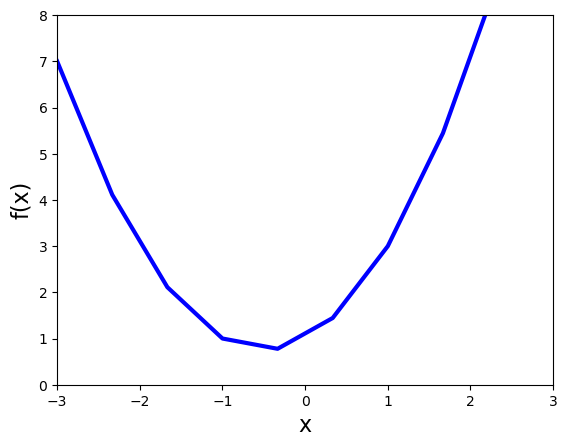

In [2]:
def f(x):
    return x**2 + x + 1

x_1 = np.linspace(start=-3, stop=3, num=10)

def plot(xlim = [-3, 3], ylim = [0, 8], xlabel = "x", ylabel = "f(x)", x_n = x_1, function = f):
    plt.xlim(xlim)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylim(ylim)
    plt.ylabel(ylabel, fontsize=16)
    plt.plot(x_n, function(x_n), color = "blue", linewidth = 3)
    
plot()


## Slope & Derivatives

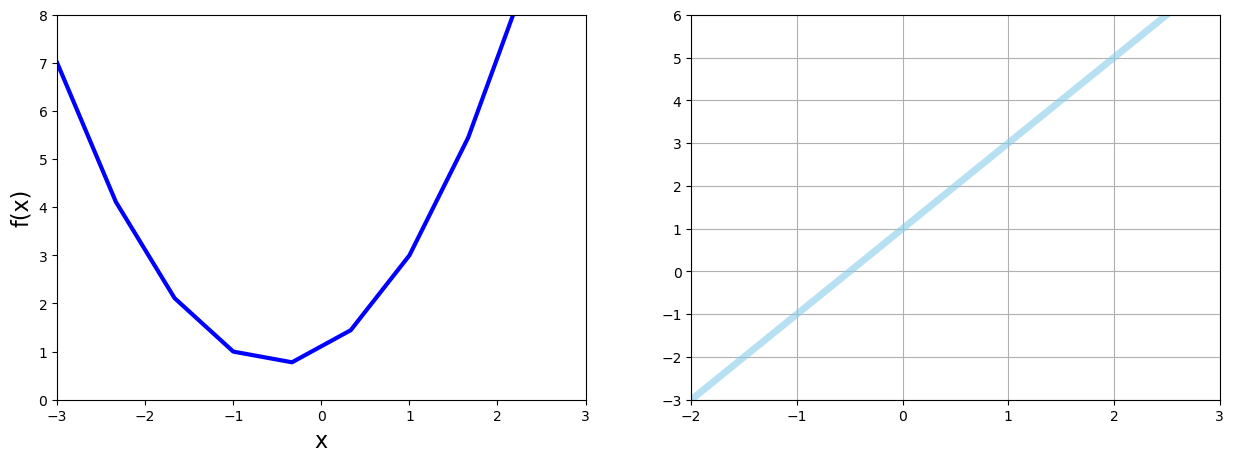

In [3]:
def df(x):
    return 2*x + 1

# Shared graph properties
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)
plot()

# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.grid()
plt.plot(x_1, df(x_1), color = "skyblue", linewidth = 5, alpha = 0.6)


## Plython Loops & Gradient Descent

In [4]:
#Gradient Descent
new_x = 3
prev_x = 0
step_multiplier = 0.1
prec = 0.0000001

x_list = [new_x]
slope_list = [df(new_x)]


for i in range(500):
    prev_x = new_x
    # gradient is the derivative of prev, store the slope in gradient
    # Note that, the further we are from the minumum the steeper the slope is
    # A steep slope means that we have a high error
    # If our slope is 0 or we are close to it that means out error is small
    gradient = df(prev_x)
    # we are subtracting because we want to move towards the minumum and against the gradient
    new_x = prev_x - (step_multiplier * gradient)
    step_size = abs(new_x - prev_x)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < prec:
        print("loop ran", i, "times")
        break;

print("Local min occurs at:", new_x)
print("Slope or df(x) value at this point is: ", df(new_x))
print("f(x) value or cost at this point is:", f(new_x))

loop ran 71 times
Local min occurs at: -0.4999996314069791
Slope or df(x) value at this point is:  7.371860417659803e-07
f(x) value or cost at this point is: 0.7500000000001359


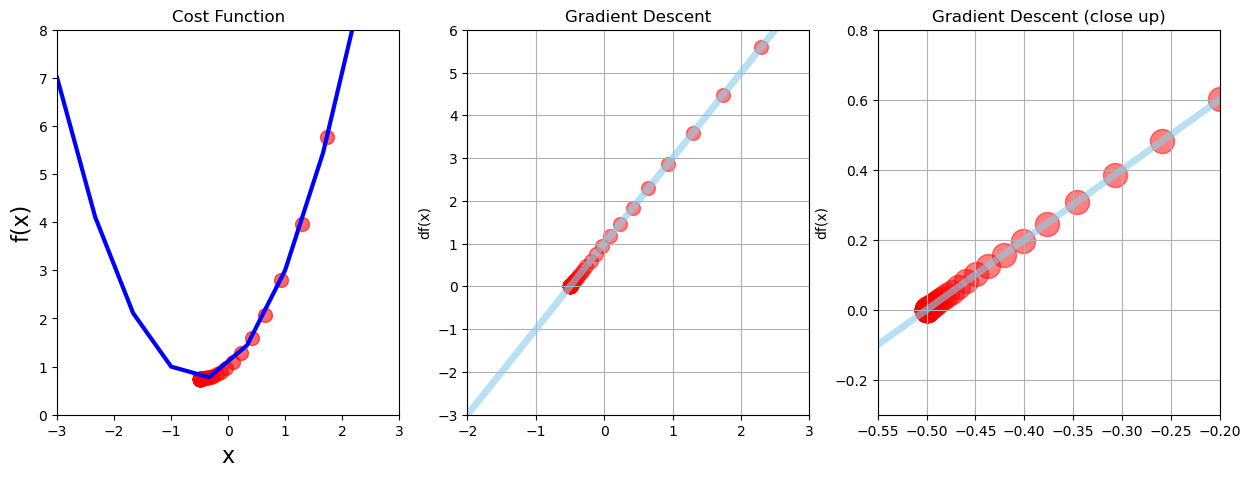

In [5]:
# Define base plot
def plotGrad(title, xlim, ylim, s = 100, ylabel = "df(x)", x_n=x_1, function=df):
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    plt.grid()
    plt.plot(x_n, function(x_n), color = "skyblue", linewidth = 5, alpha = 0.6)
    if s == False: return;
    plt.scatter(x_list, slope_list, color = "red", s = s, alpha = 0.5)

    
# Superimpose the gradient descent calculations on plot
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)
plt.title("Cost Function")
plot()

values = np.array(x_list)
plt.scatter(x_list, f(values), color = "red", s = 100, alpha = 0.6)

# 2 Chart: Derivative

plt.subplot(1, 3, 2)
plotGrad("Gradient Descent", xlim = [-2, 3], ylim = [-3, 6])

# 2 Chart: Derivative (Close up)
plt.subplot(1, 3, 3)
plotGrad("Gradient Descent (close up)", xlim = [-0.55, -0.2], ylim = [-0.3, 0.8], s = 300)



## Example 2 - Multiple Minima vs Initial Guess Advanced Functions

### $$g(x) = x^4 - 4x^2 + 5 $$

Derative

### $$dg(x) = 4x^3 - 8x$$



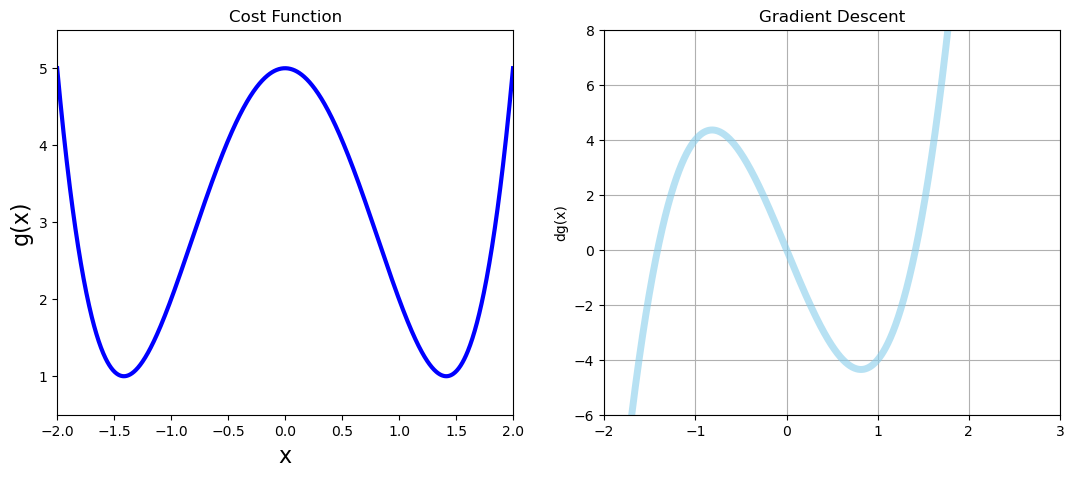

In [6]:
x_2 = np.linspace(-2, 2, 1000);

def g(x):
    return (x**4 - 4*x**2 + 5)

def dg(x):
    return (4*x**3) - (8*x)
    
# Superimpose the gradient descent calculations on plot
plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)
plt.title("Cost Function")
plot(xlim=[-2, 2], ylim=[0.5, 5.5], xlabel="x", ylabel="g(x)", x_n=x_2, function=g)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)
plotGrad("Gradient Descent", xlim = [-2, 3], ylim = [-6, 8], ylabel="dg(x)", x_n=x_2, function=dg, s=False)

In [7]:
#Gradient Descent

def gradientDescent(derivativeFunc, initGuess, mult = 0.02, prec = 0.001):
    new_x = initGuess
    x_list = [new_x]
    slope_list = [derivativeFunc(new_x)]

    for i in range(500):
        prev_x = new_x
        gradient = derivativeFunc(prev_x)
        new_x = prev_x - (mult * gradient)

        step_size = abs(new_x - prev_x)
        x_list.append(new_x)
        slope_list.append(derivativeFunc(new_x))

        if step_size < prec:
            print("loop ran for:", i)
            break

    return new_x, x_list, slope_list

local_min, list_x, deriv_list = gradientDescent(derivativeFunc=dg, initGuess=0.5, mult=0.02, prec=0.001)
print("localmin:", local_min)
print("num of steps:", len(list_x))

loop ran for: 21
localmin: 1.4122375085019094
num of steps: 23


loop ran for: 32


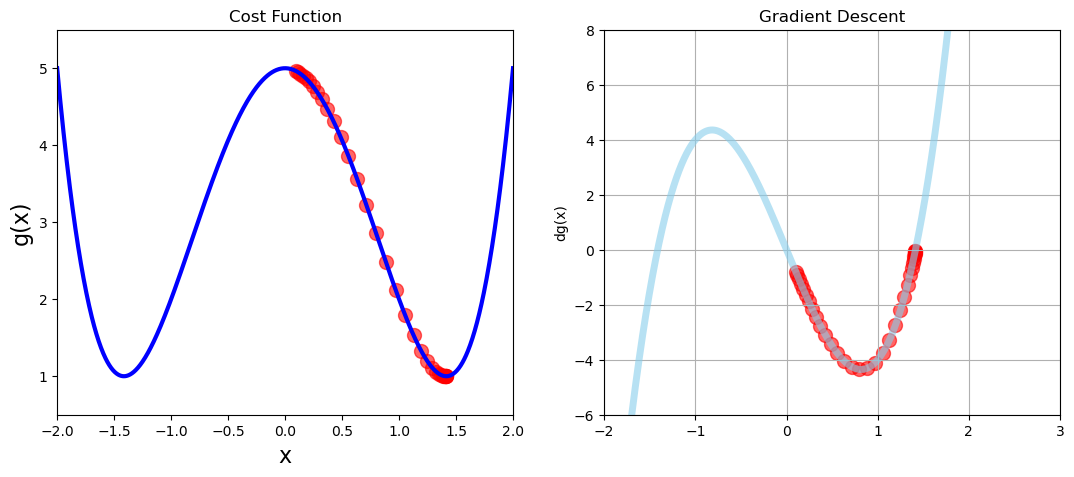

In [8]:
plt.figure(figsize=[20, 5])

local_min, list_x, deriv_list = gradientDescent(derivativeFunc=dg, initGuess=0.1)

# 1 Chart: Cost function
plt.subplot(1, 3, 1)
plt.title("Cost Function")
plot(xlim=[-2, 2], ylim=[0.5, 5.5], xlabel="x", ylabel="g(x)", x_n=x_2, function=g)
plt.scatter(list_x, g(np.array(list_x)), color="red", s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)
plotGrad("Gradient Descent", xlim = [-2, 3], ylim = [-6, 8], ylabel="dg(x)", x_n=x_2, function=dg, s=False)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.6)

## Example 3 - Divergence, Overflow and Python Tuples 

### $$h(x) = x^5 - 2x^4 + 2$$

loop ran for: 115
Local min occurs at:  1.5989534547394717
Cost at this minimum is :  -0.6214287992331258
Num of steps:  117


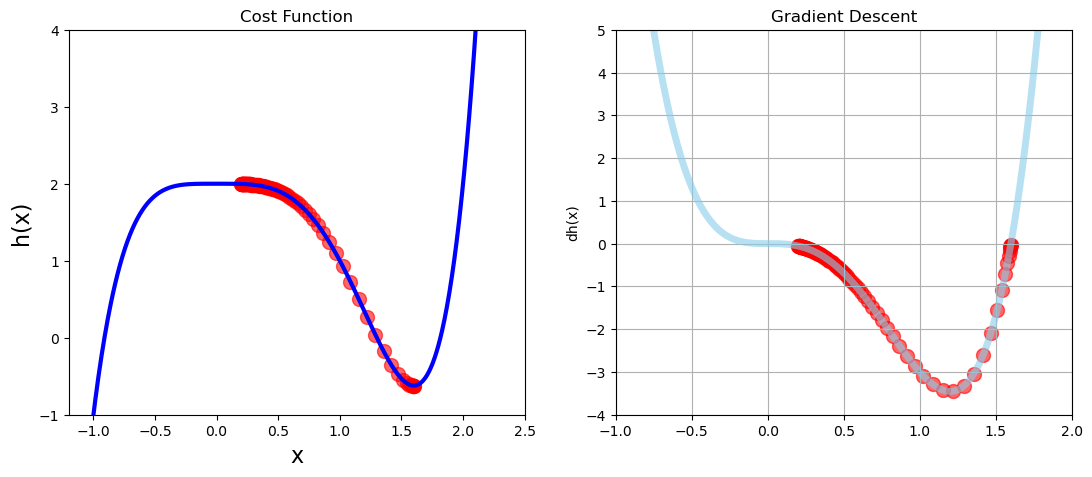

In [14]:
#Make data

x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3

local_min, list_x, deriv_list = gradientDescent(derivativeFunc=dh, initGuess=0.2)


plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)
plt.title("Cost Function")
plot(
    xlim=[-1.2, 2.5], 
    ylim=[-1, 4], 
    xlabel="x", 
    ylabel="h(x)", 
    x_n=x_3, 
    function=h
) 
plt.scatter(list_x, h(np.array(list_x)), color="red", s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)
plotGrad(
    "Gradient Descent", 
    xlim = [-1, 2], 
    ylim = [-4, 5], 
    ylabel="dh(x)", 
    x_n=x_3, 
    function=dh, 
    s=False
)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.6)

print("Local min occurs at: ", local_min);
print("Cost at this minimum is : ", h(local_min));
print("Num of steps: ", len(list_x));